In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

from scipy.stats import norm
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

%matplotlib inline
sns.set_style('white')
warnings.filterwarnings("ignore")

In [2]:
font = {'family' : 'Trebuchet MS',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

In [3]:
df = pd.read_excel('coke.xlsx', sheet_name = 'Base')

In [4]:
df

,coke,pr_pepsi,pr_coke,disp_pepsi,disp_coke,pratio
0,1,1.79,1.79,0,0,1.000000
1,1,1.79,0.89,0,1,0.497207
2,1,1.41,0.89,0,0,0.631206
3,1,1.79,1.33,0,0,0.743017
4,1,1.79,1.79,0,0,1.000000
...,...,...,...,...,...,...
1135,1,0.99,1.79,0,0,1.808081
1136,1,1.79,0.89,0,1,0.497207
1137,1,1.09,1.33,0,1,1.220183
1138,1,0.89,0.89,1,1,1.000000


In [5]:
X1 = sm.add_constant(df[['pratio', 'disp_coke', 'disp_pepsi']])

In [6]:
logit_model = sm.Logit(df['coke'], X1)
logit_results = logit_model.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.622321
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   coke   No. Observations:                 1140
Model:                          Logit   Df Residuals:                     1136
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                 0.09493
Time:                        19:38:33   Log-Likelihood:                -709.45
converged:                       True   LL-Null:                       -783.86
Covariance Type:            nonrobust   LLR p-value:                 4.715e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9230      0.326      5.902      0.000       1.284       2.562
pratio        -1.9957      0.315     -6.344      0.000      -2.612      -1.379
disp_coke      0.3516      0.159      2.218      0.027       0.041       0.662
disp_pepsi    -0.7310      0.168     -4.355      0.000      -1.060      -0.402
==============================================================================
"""

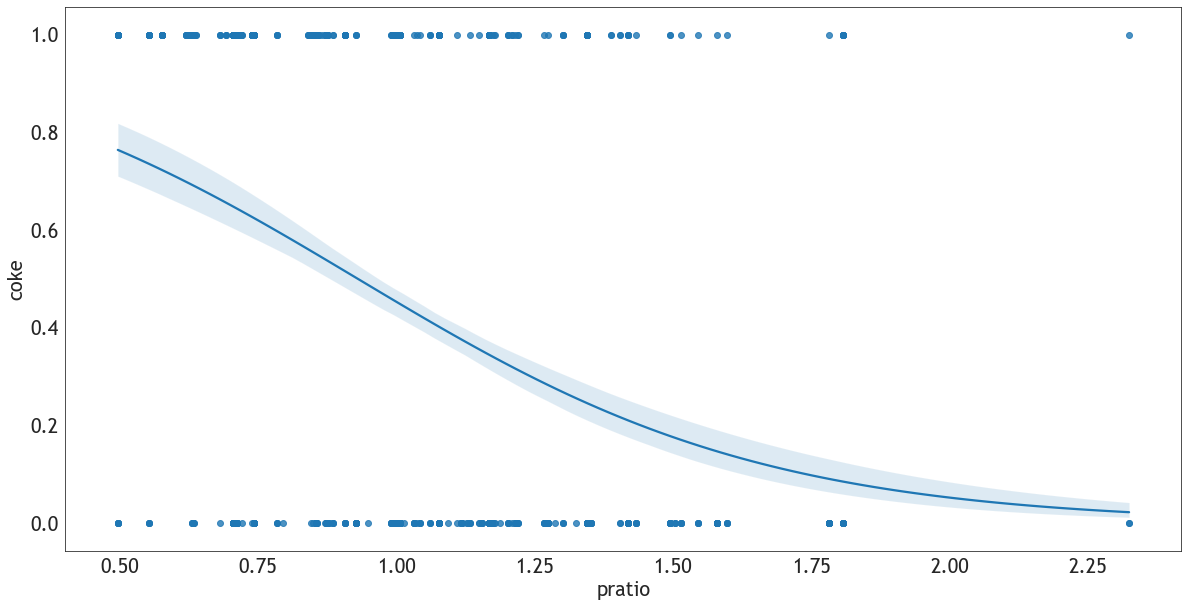

In [7]:
# Example of a seaborn logit regression plot 
# Warning: Can only use one explanatory variable on this method
fig = plt.figure(figsize = (20, 10))
ax = sns.regplot(x = 'pratio', y = 'coke', data = df,
                 logistic = True, n_boot = 100, y_jitter= 0)

In [8]:
# You can use np.multiply(pratio, 1) to modify formula
probit_model = sm.Probit.from_formula('coke ~ pratio + disp_coke + disp_pepsi', data = df)
probit_results = probit_model.fit()
probit_results.summary()

Optimization terminated successfully.
         Current function value: 0.623639
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   coke   No. Observations:                 1140
Model:                         Probit   Df Residuals:                     1136
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                 0.09302
Time:                        19:38:35   Log-Likelihood:                -710.95
converged:                       True   LL-Null:                       -783.86
Covariance Type:            nonrobust   LLR p-value:                 2.097e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1081      0.190      5.833      0.000       0.736       1.480
pratio        -1.1460      0.181     -6.335      0.000      -1.500      -0.791
disp_coke      0.2172      0.097      2.248      0.025       0.028       0.407
disp_pepsi    -0.4473      0.101     -4.411      0.000      -0.646      -0.249
==============================================================================
"""

In [9]:
# Covariance
cov = probit_results.cov_params()
cov

,Intercept,pratio,disp_coke,disp_pepsi
Intercept,0.036085,-0.033003,-0.010425,0.008014
pratio,-0.033003,0.032719,0.008453,-0.009575
disp_coke,-0.010425,0.008453,0.009333,-0.004909
disp_pepsi,0.008014,-0.009575,-0.004909,0.010283


In [10]:
std_err = np.sqrt(np.diag(cov))
std_err

array([0.18995924, 0.18088326, 0.09660838, 0.10140334])

In [11]:
# Marginal effect in this types of models are not about a unit change but a really small change
AME = probit_results.get_margeff(at = 'overall', dummy = True)
print(AME.summary())

       Probit Marginal Effects       
Dep. Variable:                   coke
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pratio        -0.4097      0.062     -6.646      0.000      -0.531      -0.289
disp_coke      0.0783      0.035      2.246      0.025       0.010       0.147
disp_pepsi    -0.1632      0.037     -4.457      0.000      -0.235      -0.091


In [12]:
# atexog = Don't know what 0 is in atexog parameter, don't use
MER = probit_results.get_margeff(at = 'overall', dummy = True, atexog = {1:1.1, 2:0, 3:0})
print(MER.summary())

       Probit Marginal Effects       
Dep. Variable:                   coke
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pratio        -0.4519      0.070     -6.429      0.000      -0.590      -0.314
disp_coke      0.0864      0.038      2.249      0.025       0.011       0.162
disp_pepsi    -0.1651      0.035     -4.658      0.000      -0.235      -0.096


In [13]:
# probability with each info from dataframe
pred_df = probit_results.predict(exog = df, linear = False)
pred_df = pred_df.reset_index()
pred_df.set_index('index', inplace = True)
pred_df.rename(columns = {0: 'prob'}, inplace = True)
pred_df.index.rename('id', inplace = True)
new_df = pd.concat([df, pred_df], axis = 1)
new_df

,coke,pr_pepsi,pr_coke,disp_pepsi,disp_coke,pratio,prob
0,1,1.79,1.79,0,0,1.000000,0.484883
1,1,1.79,0.89,0,1,0.497207,0.775015
2,1,1.41,0.89,0,0,0.631206,0.649778
3,1,1.79,1.33,0,0,0.743017,0.601252
4,1,1.79,1.79,0,0,1.000000,0.484883
...,...,...,...,...,...,...,...
1135,1,0.99,1.79,0,0,1.808081,0.167540
1136,1,1.79,0.89,0,1,0.497207,0.775015
1137,1,1.09,1.33,0,1,1.220183,0.470888
1138,1,0.89,0.89,1,1,1.000000,0.394345


In [14]:
b = probit_results.params
# model and fitted are the same thing
model = b[0] + b[1]*df['pratio'] + b[2]*df['disp_coke'] + b[3]*df['disp_pepsi']
fitted = probit_results.fittedvalues

In [15]:
data_predict = pd.DataFrame(
        [np.linspace(start = df['pratio'].min(), stop = df['pratio'].max(), num = df.shape[0]),
         np.linspace(start = df['disp_coke'].min(), stop = df['disp_coke'].max(), num = df.shape[0]),
         np.linspace(start = df['disp_pepsi'].min(), stop = df['disp_pepsi'].max(), num = df.shape[0])],
         index = ['pratio', 'disp_coke', 'disp_pepsi']).T

data_predict.head()

,pratio,disp_coke,disp_pepsi
0,0.497207,0.000000,0.000000
1,0.498811,0.000878,0.000878
2,0.500416,0.001756,0.001756
3,0.502020,0.002634,0.002634
4,0.503625,0.003512,0.003512


In [16]:
data_predict = pd.DataFrame(
        [np.linspace(start = df['pratio'].min(), stop = df['pratio'].max(), num = df.shape[0])],
         index = ['pratio']).T

data_predict['disp_coke'] = 1
data_predict['disp_pepsi'] = 1

data_predict.head()

,pratio,disp_coke,disp_pepsi
0,0.497207,1,1
1,0.498811,1,1
2,0.500416,1,1
3,0.502020,1,1
4,0.503625,1,1


In [17]:
# Predicted probability when thres both stands
probit_pred = probit_results.predict(exog = data_predict, linear = False)

In [18]:
# Confusion Matrix
cnf_matrix = probit_results.pred_table()

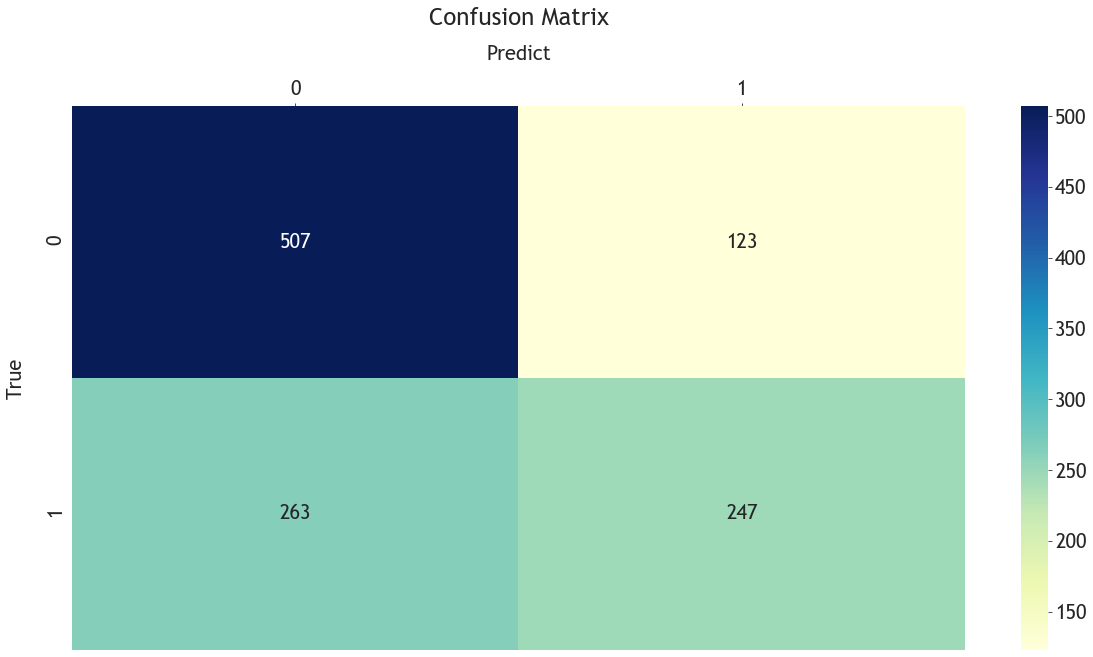

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu' ,fmt = 'g')
ax.set_title('Confusion Matrix', pad = 20)
ax.set_xlabel('Predict', labelpad = 20)    
ax.set_ylabel('True', labelpad = 20) 
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [20]:
# ROC - 
roc_fpr, roc_tpr, roc_thresholds = roc_curve(df['coke'], probit_pred)

# AUROC - 
auroc = roc_auc_score(df['coke'], probit_pred)
percent_auroc = auroc*100

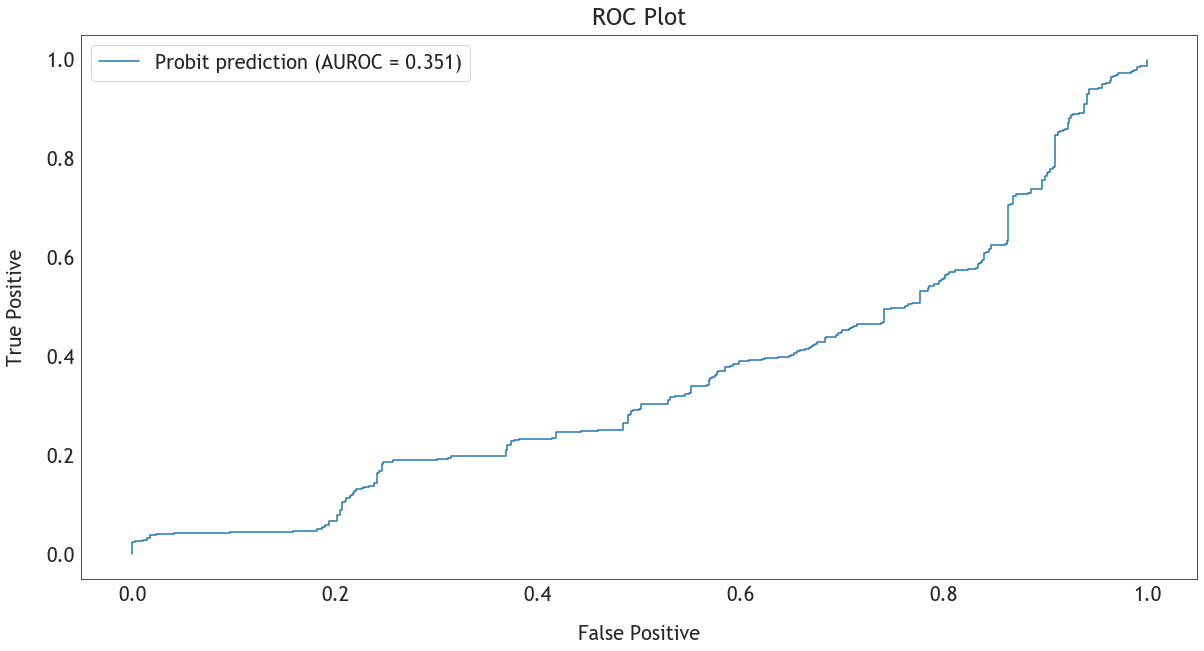

In [21]:
fig = plt.subplots(figsize=(20, 10))
plt.plot(roc_fpr, roc_tpr, label = 'Probit prediction (AUROC = %0.3f)' % auroc)
plt.title('ROC Plot', pad = 10)
plt.xlabel('False Positive', labelpad = 20)
plt.ylabel('True Positive', labelpad = 20)
plt.legend()
plt.show()

In [22]:
prediction = probit_results.predict(exog = {'pratio': 1, 'disp_coke': 0, 'disp_pepsi': 0}, linear = False)
print('With coke and pepsi having same price and no stands, theres a:', '{:.4%}'.format(prediction[0]), 'chance to get coke')

With coke and pepsi having same price and no stands, theres a: 48.4883% chance to get coke


In [23]:
coef_sum = b[0]+b[1]+b[2]+b[3]
print('Sum of coefficients:', '{:.4}'.format(coef_sum))

# In this case the interpretability is not as simple as it seems
dt = norm.pdf(coef_sum)*b[1]+b[2]+b[3]
print('Marginal effect when coke has same price as pepsi and there is both stands', '{:.4%}'.format(dt))

prob_at = norm.cdf(b[0]+b[1]+b[2]+b[3]) 
print('Probability of choosing coke when coke has same price as pepsi and theres both stands:', '{:.4%}'.format(prob_at))

# Predicted probability
prediction = probit_results.predict(exog = {'pratio': 1, 'disp_coke': 1, 'disp_pepsi': 1}, linear = False)
print('Predict at same as the above situation by statsmodel: ', '{:.4%}'.format(prediction[0]))

Sum of coefficients: -0.268
Marginal effect when coke has same price as pepsi and there is both stands -67.1155%
Probability of choosing coke when coke has same price as pepsi and theres both stands: 39.4345%
Predict at same as the above situation by statsmodel:  39.4345%


In [24]:
coef_sum = b[0]+b[1]*1.1
print('Sum of coefficients:', '{:.4}'.format(coef_sum))

# In this case where there is only pratio this is goona be same as MER Pratio
dt = norm.pdf(coef_sum)*b[1]
print('Marginal effect when coke is 10% more expensive than pepsi and theres no stands', '{:.4%}'.format(dt))

prob_at = norm.cdf(b[0]+b[1]*1.1) 
print('Probability of choosing coke when pepsi is 10% cheaper than coke and theres no stands:', '{:.4%}'.format(prob_at))

# Predicted probability
prediction = probit_results.predict(exog = {'pratio': 1.1, 'disp_coke': 0, 'disp_pepsi': 0}, linear = False)
print('Predict at same as the above situation by statsmodel: ', '{:.4%}'.format(prediction[0]))

Sum of coefficients: -0.1525
Marginal effect when coke is 10% more expensive than pepsi and theres no stands -45.1888%
Probability of choosing coke when pepsi is 10% cheaper than coke and theres no stands: 43.9397%
Predict at same as the above situation by statsmodel:  43.9397%


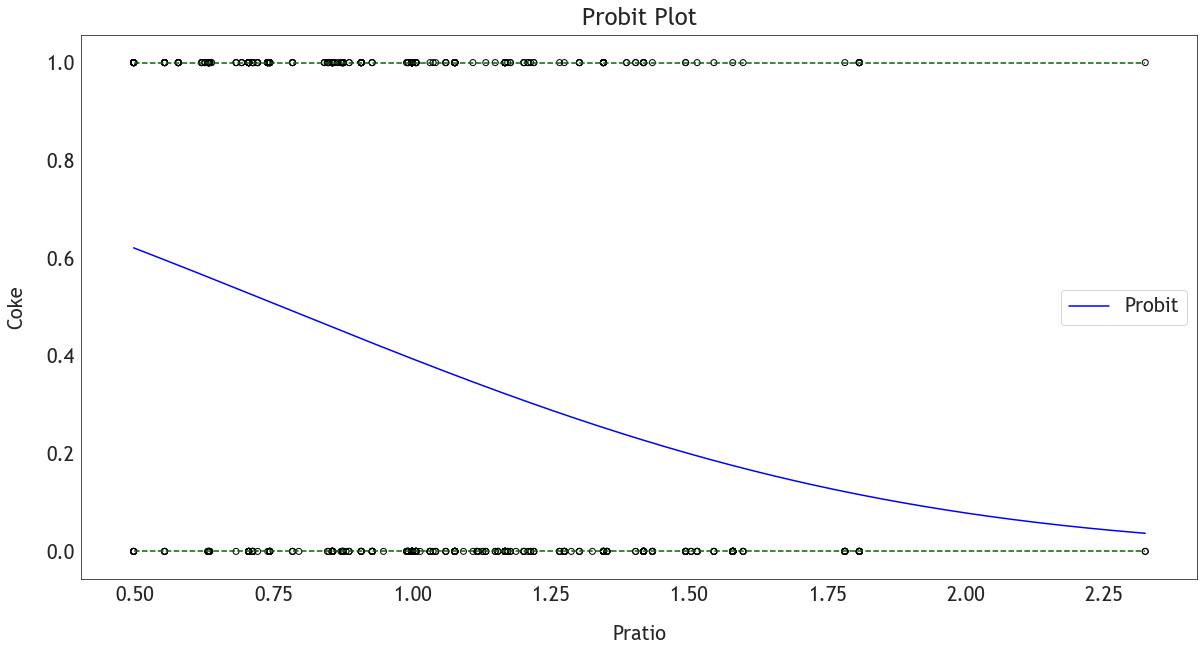

In [25]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(df['pratio'], df['coke'], edgecolor = 'black', color = 'None', label = '_nolegend_')

plt.plot(data_predict['pratio'], probit_pred, 
         color = 'blue', label = 'Probit')

plt.hlines(y = [0, 1], linestyles = 'dashed', color = 'darkgreen', label = '_nolegend_',
           xmin = data_predict['pratio'].min(), xmax = data_predict['pratio'].max())

plt.title('Probit Plot', pad = 10)
plt.xlabel('Pratio', labelpad = 20)
plt.ylabel('Coke', labelpad = 20)
plt.legend(loc = 'center right')
plt.show()

In [26]:
pratio = np.linspace(start = 0.1, stop = 2, num = 100)
pratio = np.resize(pratio, 400)                  
disp_coke = pd.Series([0, 1])
disp_coke = disp_coke.repeat(200)
disp_pepsi = pd.Series([0, 1])
disp_pepsi = disp_pepsi.repeat(100)
disp_pepsi = np.resize(disp_pepsi, 400)


multi_data_predict = pd.DataFrame([pratio, disp_coke, disp_pepsi],
         index = ['pratio', 'disp_coke', 'disp_pepsi']).T


multi_data_predict.head()

,pratio,disp_coke,disp_pepsi
0,0.100000,0.0,0.0
1,0.119192,0.0,0.0
2,0.138384,0.0,0.0
3,0.157576,0.0,0.0
4,0.176768,0.0,0.0


In [27]:
# Predicted probability when gre changes but gpa is 4.0 and from rank 1 uni
multi_probit_pred = probit_results.predict(exog = multi_data_predict, linear = False)

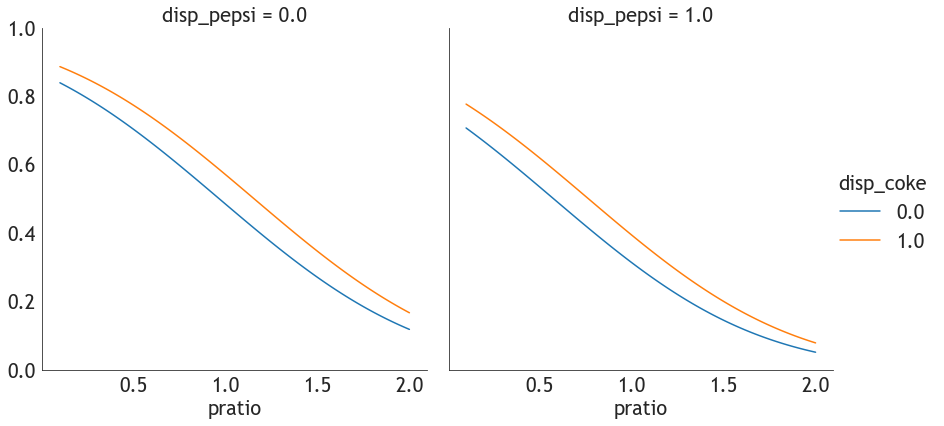

In [28]:
sns.relplot(multi_data_predict['pratio'], multi_probit_pred, 
            hue = multi_data_predict['disp_coke'], col = multi_data_predict['disp_pepsi'], 
            kind = 'line', height = 6, aspect = 1, facet_kws = dict(sharey = True))

plt.ylim([0, 1])


plt.show()

In [29]:
# fig = plt.figure(figsize = (20, 10))
# for i in range(0, 3):
   # j = ["pratio", 'disp_coke', 'disp_pepsi'][i]
   # fig.add_subplot(3, 1, i + 1).scatter(df[j], df['coke'], 
             # edgecolor = 'black', color = 'None', label = '_nolegend_')
    
   # fig.add_subplot(3, 1, i + 1).plot(data_predict[j], probit_pred, 
             # color = 'blue', label = 'Probit')
    
   # fig.add_subplot(3, 1, i + 1).hlines(y = [0, 1], 
             # linestyles = 'dashed', color = 'darkgreen', label = '_nolegend_',
             # xmin = data_predict[j].min(), xmax = data_predict[j].max())

   # plt.xlabel(j)
   # plt.legend(loc = 'center right')
   # plt.show()